In [655]:
# Importing necessary packages for matrices, plotting, image importation, and image saving
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
# wildflower.jpg is an image taken by Jason J. Hatfield

In [653]:
# Defining function to compress an individual matrix
def compress_channel(channel, k): #takes one 2D channel (R, G, or B) and compresses it
    P, E, QT = np.linalg.svd(channel, full_matrices=False) #uses numpy linalg.svd function to compute the SVD
    E = np.diag(E[:k]) # keeps only the first k singular values in the diagonal matrix 
    return P[:, :k] @ E @ QT[:k, :] # reconstructs the new compressed matrix by truncating singular values


In [620]:
# loads & deconstructs an image into R, G, and B matrices, compresses each, then reassembles
def compress_image(img_path, k):
    img = np.array(Image.open(img_path).convert('RGB'), dtype=np.float64) #loads image and converts into RGB arrays
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2] # assigning the split into the 3 matrices
    R_compressed = compress_channel(R, k) # compresses each matrix 
    G_compressed = compress_channel(G, k)
    B_compressed = compress_channel(B, k)
    img_comp = np.stack([R_compressed, G_compressed, B_compressed], axis=2) #reassembles image by layering compressed RGB
    return np.clip(img_comp, 0, 255).astype(np.uint8) #ensures pixel values stay between 0 and 255


In [175]:
compress_image("wildflower.jpg", 50)

array([[[157, 169, 181],
        [154, 169, 180],
        [158, 171, 182],
        ...,
        [229, 174,  91],
        [226, 173,  90],
        [225, 171,  91]],

       [[157, 169, 181],
        [154, 168, 180],
        [158, 171, 181],
        ...,
        [230, 174,  91],
        [226, 173,  91],
        [225, 171,  91]],

       [[156, 169, 180],
        [154, 168, 179],
        [158, 171, 181],
        ...,
        [231, 174,  91],
        [227, 173,  91],
        [226, 172,  92]],

       ...,

       [[  0,  12,  11],
        [  0,   9,  12],
        [  0,   0,  13],
        ...,
        [105,  77,  27],
        [ 85,  64,  23],
        [ 76,  60,  20]],

       [[  0,  14,  16],
        [  0,   9,  14],
        [  0,   0,  16],
        ...,
        [ 98,  79,  26],
        [ 78,  65,  23],
        [ 71,  61,  22]],

       [[  0,  12,  11],
        [  0,   7,   8],
        [  3,   0,  12],
        ...,
        [ 95,  78,  20],
        [ 76,  63,  19],
        [ 70,  60,  20]]

In [649]:
# THIS VERSION IS MORE ACCURATE for compression BUT RGB VALUES DONT STAY BETWEEN 0 AND 255 RANGE SO IMAGES GET FUNKY
def compress_image_float(img_path, k):
    img = np.array(Image.open(img_path).convert('RGB'), dtype=np.float64) #loads image and converts into RGB arrays
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2] # assigning the split into the 3 matrices
    R_compressed = compress_channel(R, k) # compresses each matrix 
    G_compressed = compress_channel(G, k)
    B_compressed = compress_channel(B, k)
    img_comp = np.stack([R_compressed, G_compressed, B_compressed], axis=2) #reassembles image by layering compressed RGB
    return img_comp


In [117]:
# compress_image("self_titled_deftones_cover.jpg", 25)

In [455]:
# loading images will only work if you have the image in your directory that has your python files
original_img = np.array(Image.open("wildflower.jpg").convert("RGB"), dtype=np.float64)

In [338]:
original_img.nbytes-compressed_img_25.nbytes

35851200

In [341]:
original_img.nbytes / 10**6

40.9728

In [343]:
compressed_img_25.nbytes / 10**6

5.1216

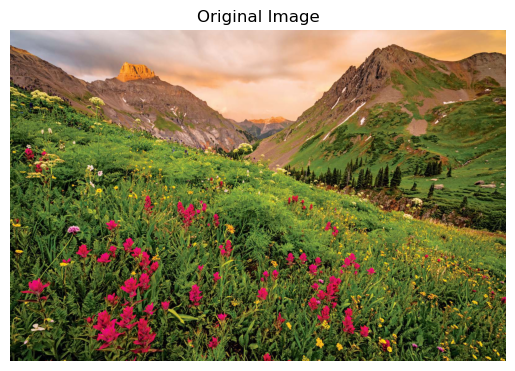

In [245]:
# Original image (k=640)
plt.imshow(original_img.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')
plt.show()

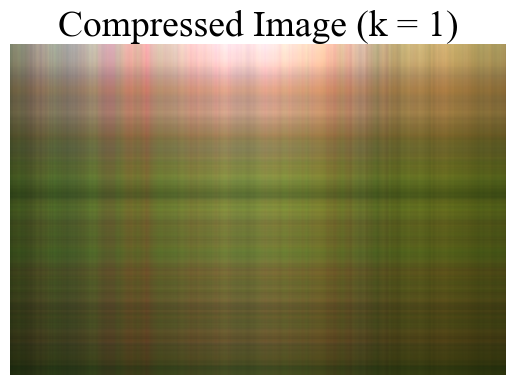

In [379]:
# Image keeps k out of max num SVs
plt.imshow(compress_image('wildflower.jpg', 1))
plt.title('Compressed Image (k = 1)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

In [648]:
# Tells you how different compressed image is from original image by computing difference in frobenius norm
def reconstruction_error(original, compressed):
    return np.linalg.norm(original - compressed).round(3)


In [81]:
reconstruction_error(original_img, compressed_img_5) # error from k=5

56874.006

In [647]:
# Lists reconstruction error between original and compressed for a given number of singular values kept
k_values = [5, 100, 500, 1067]
errors = []

for k in k_values:
    compressed = compress_image_float("wildflower.jpg", k)
    err = reconstruction_error(original_img, compressed)
    errors.append(err)
    print(f"k = {k}, Reconstruction error = {err:.2f}")


k = 5, Reconstruction error = 78145.88
k = 100, Reconstruction error = 39688.43
k = 500, Reconstruction error = 8050.82
k = 1067, Reconstruction error = 1588.52


In [645]:
# Calculates the maximum k value for an image
height, width, _ = original_img.shape
k_max = min(height, width)
print(f"Maximum possible k (no compression): {k_max}")


Maximum possible k (no compression): 1067


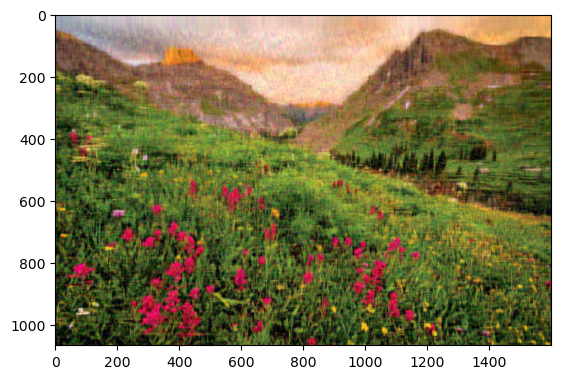

In [313]:
plt.imshow(compress_image("wildflower.jpg", 50))

In [624]:
# Function to compress and visualize process, displays original, compressed R, G, and B, and the reassembled compressed matrix
def compress_and_visualize(img_path, k):
    # Load image and split into RGB
    img = np.array(Image.open(img_path).convert('RGB'), dtype=np.float64)
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

    # Compress each channel
    R_comp = compress_channel(R, k)
    G_comp = compress_channel(G, k)
    B_comp = compress_channel(B, k)

    # Reconstruct final RGB image
    img_comp = np.stack([R_comp, G_comp, B_comp], axis=2)
    img_comp_clipped = np.clip(img_comp, 0, 255).astype(np.uint8)

    # Plotting
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Original image
    axs[0, 0].imshow(img.astype(np.uint8))
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Compressed R Image
    axs[0, 1].imshow(R_comp, cmap='Reds')
    axs[0, 1].set_title(f'Compressed Red Channel (k={k})')
    axs[0, 1].axis('off')

    # Compressed G Image
    axs[0, 2].imshow(G_comp, cmap='Greens')
    axs[0, 2].set_title(f'Compressed Green Channel (k={k})')
    axs[0, 2].axis('off')

    # Compressed B Image
    axs[1, 0].imshow(B_comp, cmap='Blues')
    axs[1, 0].set_title(f'Compressed Blue Channel (k={k})')
    axs[1, 0].axis('off')

    # Reconstructs compressed image
    axs[1, 1].imshow(img_comp_clipped)
    axs[1, 1].set_title('Reconstructed Compressed Image')
    axs[1, 1].axis('off')

    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

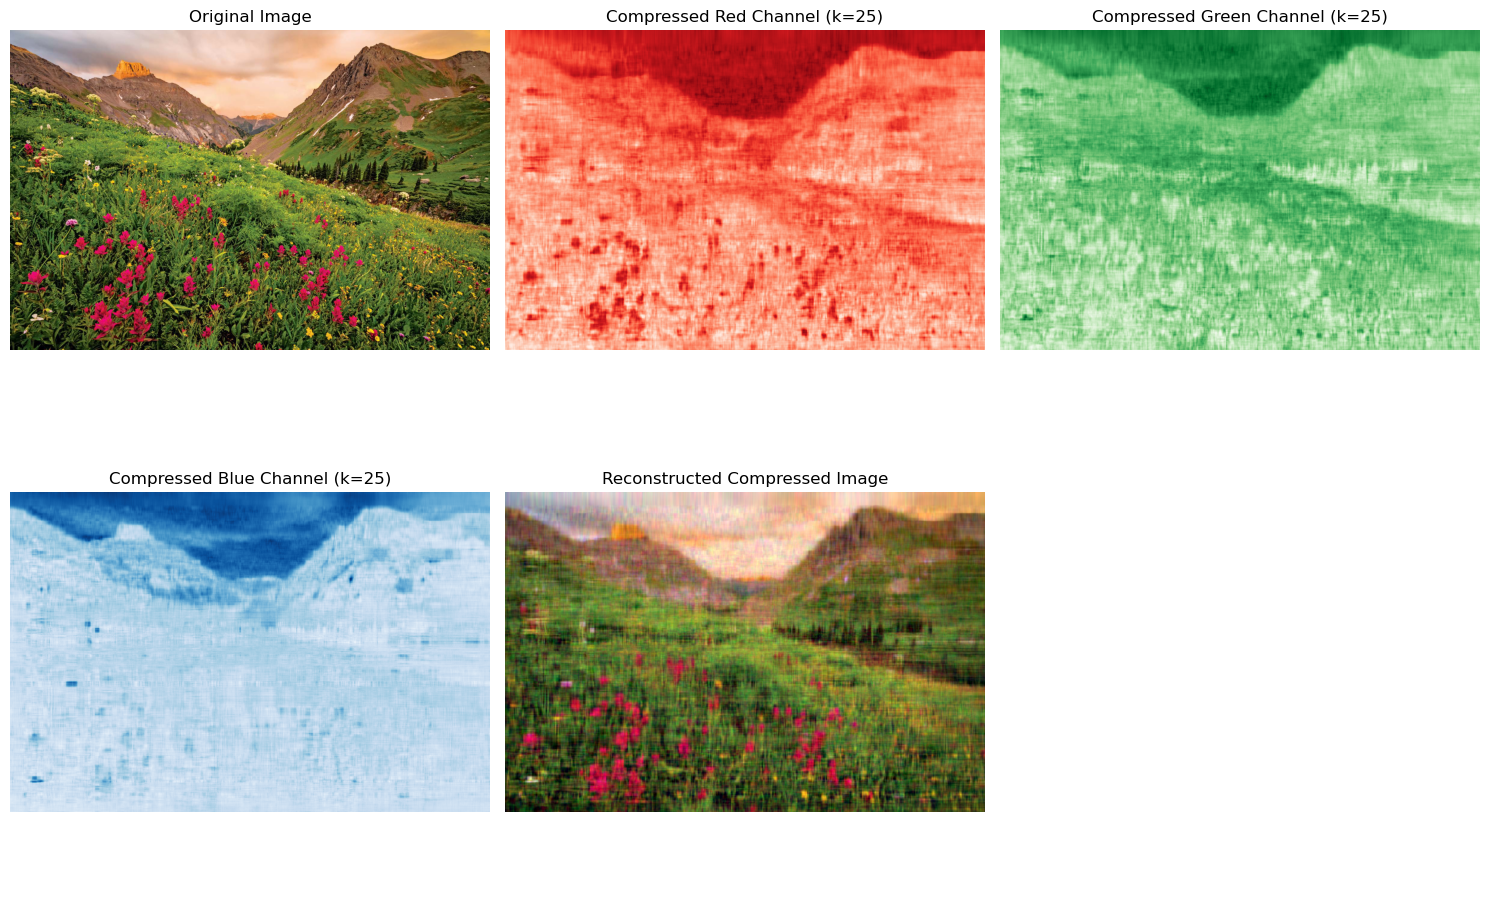

In [345]:
compress_and_visualize('wildflower.jpg', k=25)

In [643]:
# Calculates a standardized difference in frobenius norm, standardized by number of total pixels in the image
# Tells you how different, on average, each pixel is from the original
def standard_norm_diff(img_path, k):
    compressed_image = compress_image_float(img_path, k)
    original_image = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)

    # Finds maximum number of singular values and pixels for a given image
    height, width, _ = original_image.shape
    k_max = min(height, width)
    num_pixels = height*width

    # This is the output, the stanrardized difference in frobenius norm
    avg_diff = (reconstruction_error(original_image, compressed_image) / num_pixels) 

    return avg_diff

    # print(f"Normalized absolute reconstruction error per pixel is {avg_diff} for k={k}, compared to the original which has k={k_max}.")

In [407]:
standard_norm_diff('wildflower.jpg', 15).round(4)

0.0397

In [641]:
# Plots normalized reconstruction error per pixel vs singular values retained
def plot_norm_diff(img_path, num_k_values):
    original_image = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)

    # Calculates maximum number of singular values
    height, width, _ = original_image.shape
    k_max = min(height, width)

    # Defines vectors for plotting, with num_k_values being how many points are plotted
    k_values = np.linspace(1, k_max, num_k_values, dtype=int)
    std_norms = [standard_norm_diff(img_path, k) for k in k_values]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, std_norms, marker='o', linestyle='-')
    plt.annotate(f"max k = {k_values[-1]}",
             xy=(k_values[-1], std_norms[-1]),
             xytext=(k_values[-1] - 250, std_norms[-1] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=20,
             color='red', fontname="Times New Roman")
    plt.xlabel("k (Number of Singular Values)", fontsize=20, fontname="Times New Roman")
    plt.ylabel("Normalized Reconstruction Error", fontsize=20, fontname="Times New Roman")
    plt.title("Normalized Absolute Reconstruction Error per Pixel vs. k", fontsize=20, fontname="Times New Roman")
    plt.xticks(fontsize=20, fontname="Times New Roman")
    plt.yticks(fontsize=20, fontname="Times New Roman")
    plt.grid(True)
    plt.show()
    

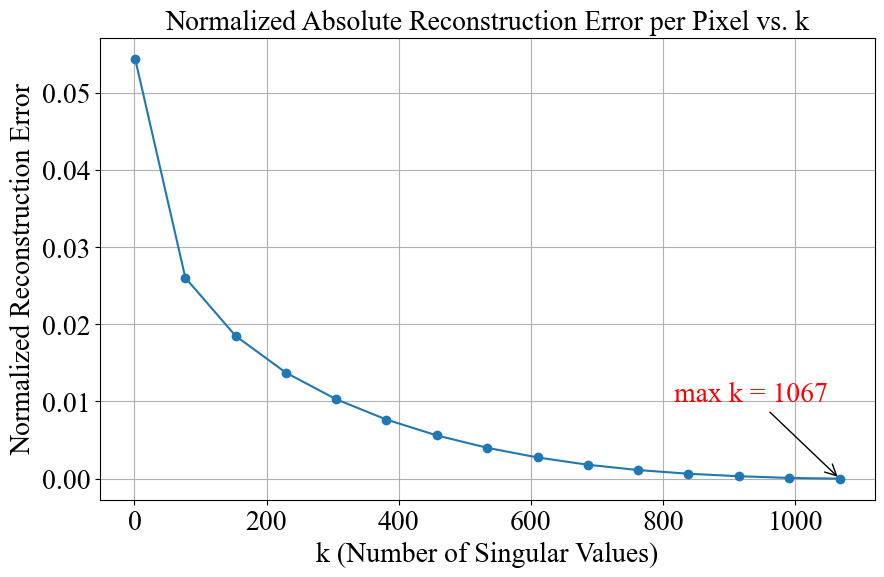

In [439]:
plot_norm_diff('wildflower.jpg', 15)

In [639]:
# Sets default font globally for plot format consistency
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Same as last plot except the line is plotted against an idealized compressed size in RAM memory
def plot_norm_diff_and_size(img_path, num_k_values):
    original_image = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)
    
    height, width, _ = original_image.shape
    k_max = min(height, width)

    original_size_bytes = original_image.nbytes  # Raw original size (in bytes)
    original_size_MB = original_size_bytes / 1e6 # Raw original size (in MB)

    k_values = np.linspace(1, k_max, num_k_values, dtype=int)
    
    # Computes normalized errors
    std_norms = [standard_norm_diff(img_path, k) for k in k_values]

    # Ideallized ompressed size is proportional to k based on number of bytes (RAM)
    compressed_sizes_MB = [(k / k_max) * original_size_MB for k in k_values]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Axis 1 - left side
    ax1.set_xlabel("k (Number of Singular Values)")
    ax1.set_ylabel("Normalized Reconstruction Error", color="black")
    ax1.plot(k_values, std_norms, marker='o', linestyle='-', color="blue", label="Reconstruction Error")
    ax1.grid(True)

    ax1.annotate(f"max k = {k_values[-1]}",
                 xy=(k_values[-1], std_norms[-1]),
                 xytext=(k_values[-1] - 250, std_norms[-1] + 0.01),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 color='red')

    # Axis 2 - right side
    ax2 = ax1.twinx()

    ax2.set_ylabel("Idealized Compressed Size (MB)", color='tab:green')

    # Plots compressed size proportional to k
    ax2.plot(k_values, compressed_sizes_MB, marker='x', linestyle='--', color='tab:green', label="Compressed Size")

    plt.title(f"Normalized Reconstruction Error and Idealized Compressed Size vs. k\nOriginal Image Size: {original_size_MB:.2f} MB")
    fig.tight_layout()

    plt.show()


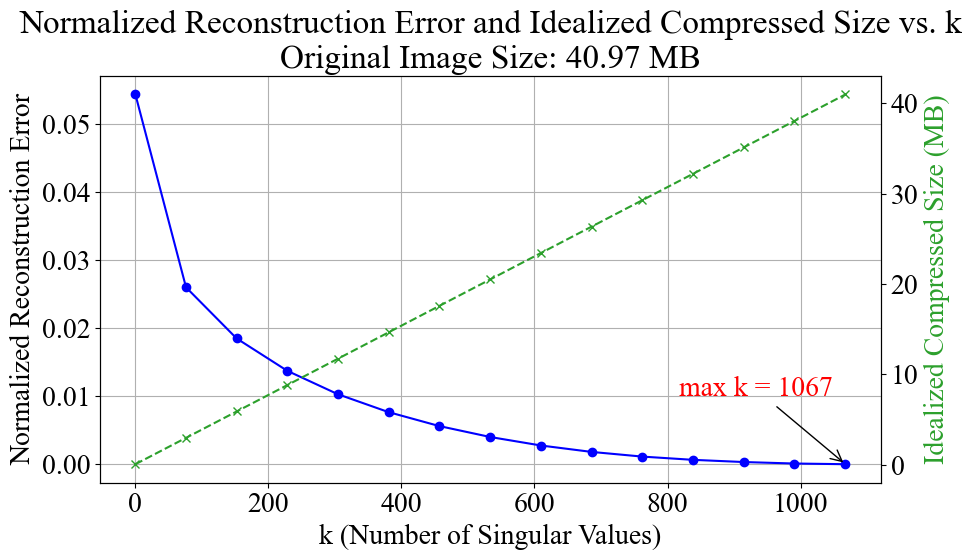

In [532]:
plot_norm_diff_and_size('wildflower.jpg', 15)

In [637]:
# Not used in paper, but this plots 1 minus the reconstruction error to illustrate the idealized trade-off between image quality and image size
def plot_norm_diff_and_size_nbytes(img_path, num_k_values):
    
    original_image = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)
    height, width, _ = original_image.shape
    k_max = min(height, width)
    k_values = np.linspace(1, k_max, num_k_values, dtype=int)

    # Compute SVDs for each channel
    R, G, B = original_image[:,:,0], original_image[:,:,1], original_image[:,:,2]
    UR, SR, VTR = np.linalg.svd(R, full_matrices=False)
    UG, SG, VTG = np.linalg.svd(G, full_matrices=False)
    UB, SB, VTB = np.linalg.svd(B, full_matrices=False)

    std_norms = []
    compressed_sizes = []

    for k in k_values:
        # Compressed matrices
        Pr, Sr, Qr = UR[:, :k], SR[:k], VTR[:k, :]
        Pg, Sg, Qg = UG[:, :k], SG[:k], VTG[:k, :]
        Pb, Sb, Qb = UB[:, :k], SB[:k], VTB[:k, :]

        # Size in RAM memory (nbytes)
        size_r = Pr.nbytes + Sr.nbytes + Qr.nbytes
        size_g = Pg.nbytes + Sg.nbytes + Qg.nbytes
        size_b = Pb.nbytes + Sb.nbytes + Qb.nbytes

        total_size_bytes = size_r + size_g + size_b

        total_size_mb = total_size_bytes / 1e6
        
        compressed_sizes.append(total_size_mb)

        # Standard normalized error
        std_norms.append(standard_norm_diff(img_path, k))

    # Plots k vs. error
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting
    color = 'tab:blue'
    ax1.set_xlabel("k (Number of Singular Values)")
    ax1.set_ylabel("1 - Normalized Reconstruction Error", color=color)
    ax1.plot(k_values, [1 - e for e in std_norms], marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # This part just adds an arrow to note max k (original image)
    ax1.annotate(f"max k = {k_values[-1]}",
                 xy=(k_values[-1], 1 - std_norms[-1]),
                 xytext=(k_values[-1] - 100, 1 - std_norms[-1] + 0.01),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10,
                 color='red')

    # Adds second y-axis for idealized compressed size
    ax2 = ax1.twinx()

    color = 'tab:green'
    ax2.set_ylabel("Idealized Compressed Size (MB)", color=color)
    ax2.plot(k_values, compressed_sizes, marker='x', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title("Normalized Reconstruction Error and Idealized Compressed Size (MB) vs. k")
    fig.tight_layout()
    plt.show()



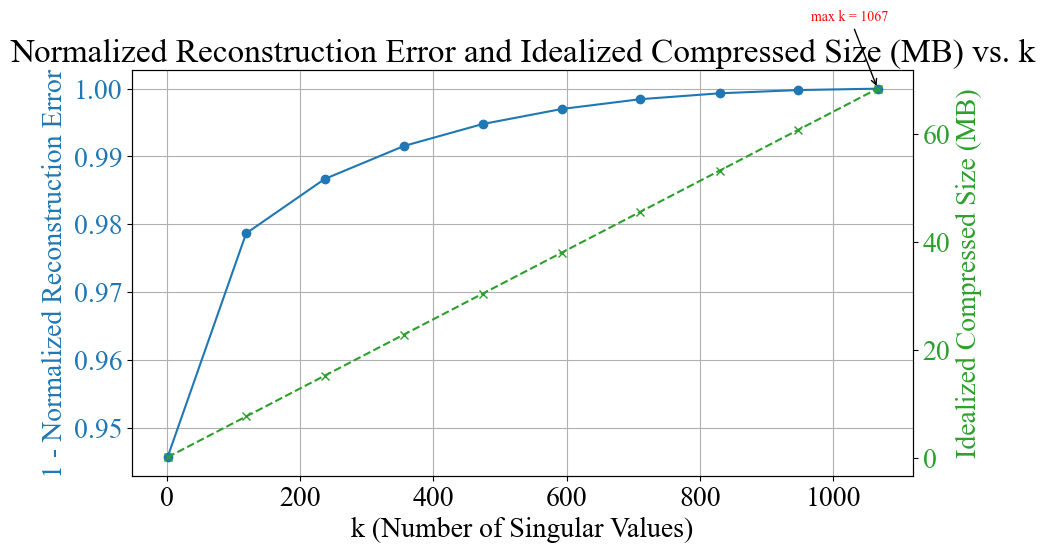

In [524]:
plot_norm_diff_and_size_nbytes('wildflower.jpg', 10)

In [498]:
original_img = compress_image('wildflower.jpg', 900)
compressed_500 = compress_image('wildflower.jpg', 500)
compressed_15 = compress_image('wildflower.jpg', 15)

In [657]:
# Saves compressed images as jpg to measure JPEG file size after compression for a constant quality
Image.fromarray(original_img).save("original_image_saved.jpg", quality=85)
Image.fromarray(compressed_500).save("compressed_k500.jpg", quality=85)
Image.fromarray(compressed_15).save("compressed_k15.jpg", quality=85)

In [659]:
# Returns JPEG file size in megabytes
file_size_original = os.path.getsize("original_image_saved.jpg") / 1e6
print(file_size_original)

0.516801


In [491]:
file_size_500 = os.path.getsize("compressed_k500.jpg") / 1e6
print(file_size_500)

0.53061


In [492]:
file_size_15 = os.path.getsize("compressed_k15.jpg") / 1e6
print(file_size_15)

0.266325


In [661]:
# Defines vectors of image sizes for 15 evenly spaced k values
k_values2 = k_values = np.linspace(1, k_max, 15, dtype=int)
sizes = []
for k in k_values2:
    compressed_k = compress_image('wildflower.jpg', k)
    Image.fromarray(compressed_k).save(f"compressed_{k}.jpg", quality = 85)
    sizes.append(os.path.getsize(f"compressed_{k}.jpg") / 1e6)

print(sizes)

KeyboardInterrupt: 

In [536]:
k_values2

array([   1,   77,  153,  229,  305,  381,  457,  534,  610,  686,  762,
        838,  914,  990, 1067])

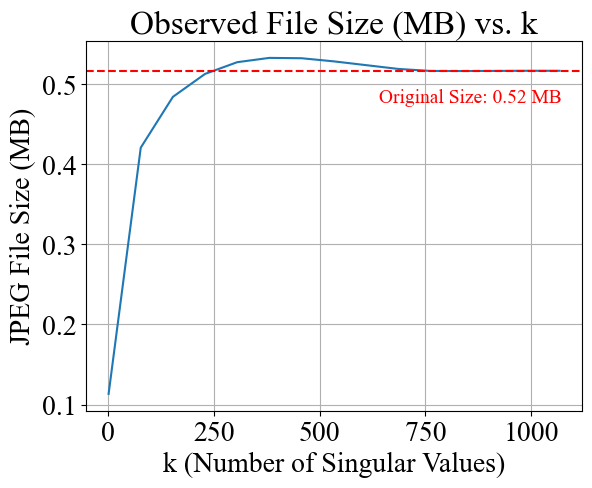

In [556]:
# Plots JPEG file size versus the number of singular values kept
original_size_MB = os.path.getsize("compressed_1067.jpg") / 1e6

plt.plot(k_values2, sizes)
plt.axhline(y=original_size_MB, color='red', linestyle='--', label=f"Original Size: {original_size_MB:.2f} MB")
plt.text(x=k_values2[-1]*0.6, y=original_size_MB - 0.04, 
         s=f"Original Size: {original_size_MB:.2f} MB", 
         color='red', fontsize=14) # adds annotation to plot for y intercept
plt.grid(True)
plt.xlabel("k (Number of Singular Values)")
plt.ylabel("JPEG File Size (MB)")
plt.title("Observed File Size (MB) vs. k")
plt.show()

In [663]:
# have to define a new function for normalized error in order for plot to show, takes very long
def precompute_svd(img_path):
    img = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    
    # Full SVD for each color 
    U_r, S_r, Vt_r = np.linalg.svd(R, full_matrices=False)
    U_g, S_g, Vt_g = np.linalg.svd(G, full_matrices=False)
    U_b, S_b, Vt_b = np.linalg.svd(B, full_matrices=False)
    
    return (U_r, S_r, Vt_r), (U_g, S_g, Vt_g), (U_b, S_b, Vt_b), img.shape

In [665]:
# More efficient compression and reconstruction function
def reconstruct_from_svd(svd_channels, shape, k):
    (U_r, S_r, Vt_r), (U_g, S_g, Vt_g), (U_b, S_b, Vt_b) = svd_channels
    h, w, _ = shape
    
    # Keeps top k singular values
    R = (U_r[:, :k] @ np.diag(S_r[:k]) @ Vt_r[:k, :])
    G = (U_g[:, :k] @ np.diag(S_g[:k]) @ Vt_g[:k, :])
    B = (U_b[:, :k] @ np.diag(S_b[:k]) @ Vt_b[:k, :])
    
    # Stacks RGB back together
    img_comp = np.stack([R, G, B], axis=2)
    return np.clip(img_comp, 0, 255).astype(np.uint8)

In [667]:
# More efficient standardized norm difference function
def fast_standard_norm_diff(original_img, compressed_img):
    error = np.linalg.norm(original_img - compressed_img)
    return (error / (original_img.shape[0] * original_img.shape[1])).round(3)

In [582]:
# Three new image paths
three_img_paths = ["gauss.jpg", "butterfly.jpg", "strawberries.jpg"]

# Uses a nested for loop to plot the three lines representing the relationship between percentage of k-values retained and normalized reconstruction error

def plot_reconstruction_comparison(img_paths, num_k_values=10): # Inputs: list of file strings, number of partitions of total k values

    plt.figure(figsize=(10,6))
    colors = ['brown', 'blue', 'red'] 

    for idx, img_path in enumerate(img_paths):
        
        # Loads image
        original_image = np.array(Image.open(img_path).convert("RGB"), dtype=np.float64)

        # Precomputes full SVD once
        svd_r, svd_g, svd_b, shape = precompute_svd(img_path)
        svd_channels = (svd_r, svd_g, svd_b)

        # Calculates maximum number of singular values for each image
        height, width, _ = shape
        k_max = min(height, width)

        k_values = np.linspace(1, k_max, num_k_values, dtype=int)

        errors = []

        # Creates error vector
        for k in k_values:
            compressed = reconstruct_from_svd(svd_channels, shape, k)
            error = fast_standard_norm_diff(original_image, compressed)
            errors.append(error)

        # Converts k to percentages (standardizes) for comparison of images of different sizes
        k_percentages = (k_values / k_max) * 100

        # Plotting for each image
        plt.plot(k_percentages, errors, marker='o', linestyle='-', 
                 label=f"Image {idx+1}", color=colors[idx % len(colors)])

    # Plotting 
    plt.xlabel("Percentage of Singular Values Retained")
    plt.ylabel("Normalized Reconstruction Error")
    plt.title("Comparison of Normalized Reconstruction Error vs %k for Different Images")
    plt.grid(True)
    plt.xticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.show()

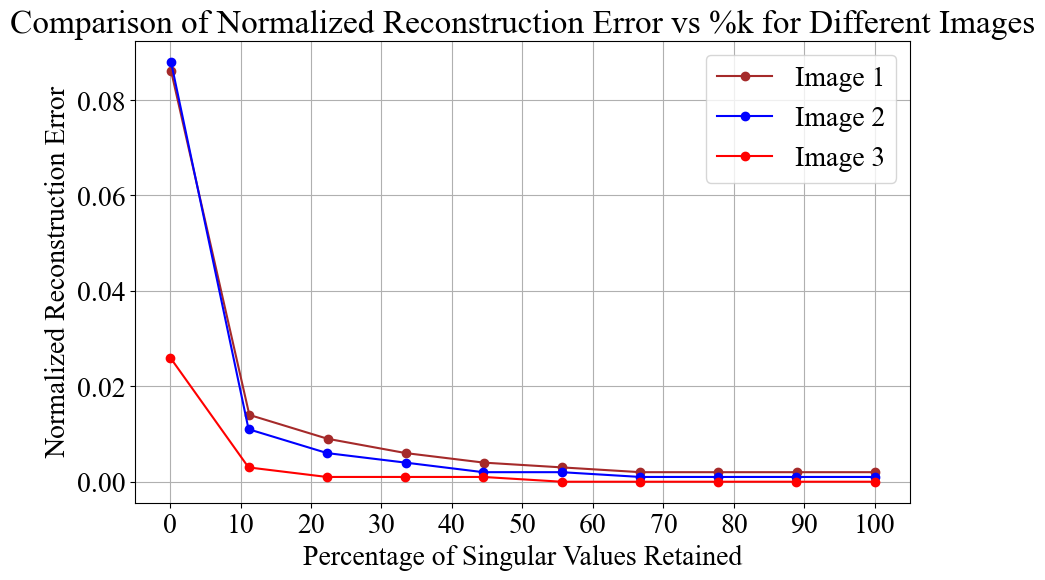

In [584]:
plot_reconstruction_comparison(three_img_paths)

In [600]:
# k values for gauss image
gauss_original_img = np.array(Image.open("gauss.jpg").convert("RGB"), dtype=np.float64)
height_gauss, width_gauss, _ = gauss_original_img.shape
k_max_gauss = min(height_gauss, width_gauss)
print(k_max_gauss)

640


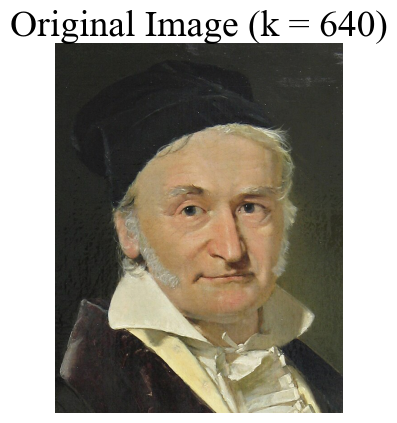

In [590]:
# Gauss original image
plt.imshow(compress_image('gauss.jpg', 640))
plt.title('Original Image (k = 640)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

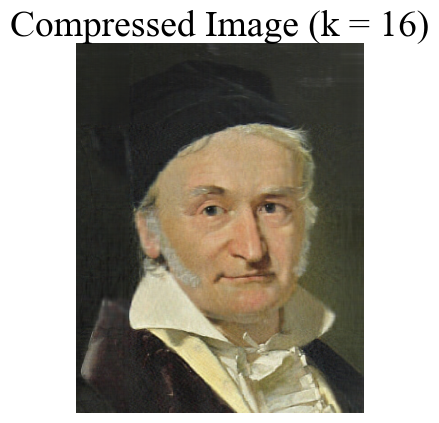

In [596]:
# Gauss compressed image
plt.imshow(compress_image('gauss.jpg', 64))
plt.title('Compressed Image (k = 16)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

In [602]:
# k values for butterfly image
butterfly_original_img = np.array(Image.open("butterfly.jpg").convert("RGB"), dtype=np.float64)
height_butterfly, width_butterfly, _ = butterfly_original_img.shape
k_max_butterfly = min(height_butterfly, width_butterfly)
print(k_max_butterfly)

763


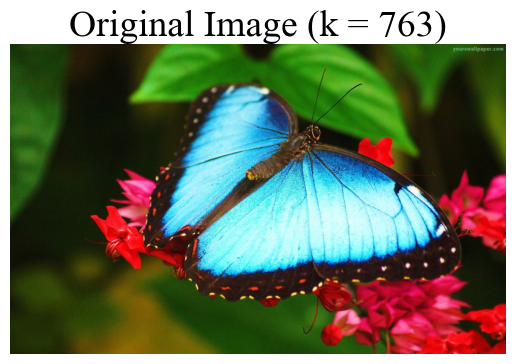

In [604]:
# Butterfly original image
plt.imshow(compress_image('butterfly.jpg', 763))
plt.title('Original Image (k = 763)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

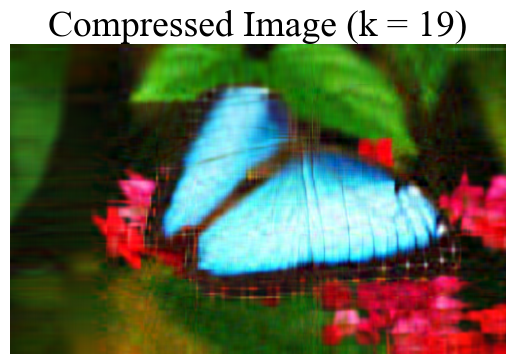

In [606]:
# Butterfly compressed image
plt.imshow(compress_image('butterfly.jpg', 19))
plt.title('Compressed Image (k = 19)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

In [608]:
# k values for strawberry image
berries_original_img = np.array(Image.open("strawberries.jpg").convert("RGB"), dtype=np.float64)
height_berries, width_berries, _ = berries_original_img.shape
k_max_berries = min(height_berries, width_berries)
print(k_max_berries)

3000


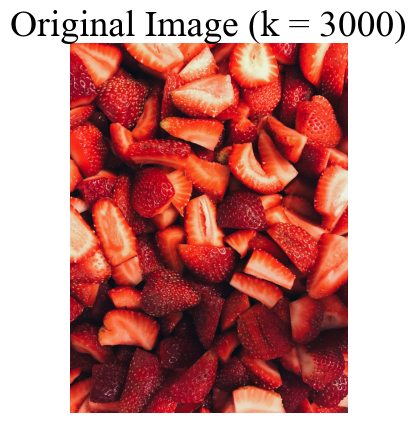

In [610]:
# Strawberries original image
plt.imshow(compress_image('strawberries.jpg', 3000))
plt.title('Original Image (k = 3000)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()

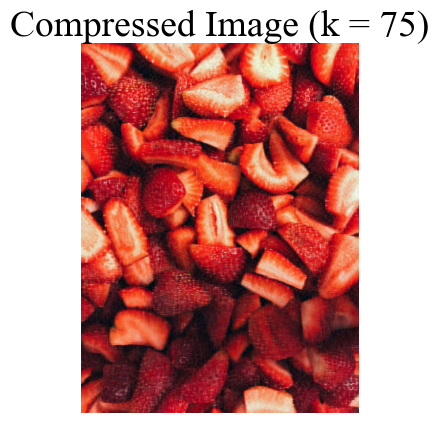

In [614]:
# Strawberries compressed image
plt.imshow(compress_image('strawberries.jpg', 75))
plt.title('Compressed Image (k = 75)', fontsize=27, fontname="Times New Roman")
plt.axis('off')
plt.show()